In [27]:
import pandas as pd
import joblib
dataset = pd.read_csv('/Users/adi/Desktop/TA_Adi_V2/QE Statistik V2/logistic_regression/dataset/keparahan13juli.csv')
dataset.fillna(dataset.mean(), inplace = True)

/var/folders/tl/qtfjbsjd2f3f54prw95dl_5m0000gn/T/ipykernel_83476/21832333.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


In [28]:
dataset

,No Document,title,Description,Mati,Luka,KerugianBarang,KerugianUang,Pemerkosaan,Keparahan
0,0,"Mamih Juju Tewas di Musala Ruko, Polisi: Didug...",\-\n\nJuju Juariyah alias Mamih Juju ditemukan...,1,1,0,0,0,Tinggi
1,1,Remaja Korban Pemerkosaan Ayah Tiri di Cianjur...,\-\n\nRemaja di Kabupaten Cianjur menjadi korb...,0,0,0,0,1,Tinggi
2,2,"Pria di Gunungkidul Diduga Perkosa Anak Tiri, ...",\-\n\nSeorang pria di Kabupaten Gunungkidul di...,0,0,0,0,1,Tinggi
3,3,Polisi: Massa HMI Demo Depan Istana Bawa Bensi...,\-\n\nPolisi menyatakan demo massa Himpunan Ma...,0,0,0,0,0,Rendah
4,4,Cerita Ngenas Petugas PPSU Korban Begal di Jak...,\-\n\nPetugas Penanganan Prasarana dan Sarana ...,0,1,1,1,0,Tinggi
...,...,...,...,...,...,...,...,...,...
1202,1202,"Sekeluarga di Jaktim Ngungsi Usai Dikeroyok, R...",\-\n\nSatu keluarga di Jakarta Timur (Jaktim) ...,0,0,1,0,0,Rendah
1203,1203,"Pembobolan Toko Aksesori HP di Bogor, Pelaku k...",\-\n\nPolisi melakukan olah tempat kejadian pe...,0,0,1,129000000,0,Tinggi
1204,1204,KPAI Duga Gadis yang Diperkosa Ayah Tiri di Ri...,\-\n\nKomisi Perlindungan Anak Indonesia (KPAI...,0,1,0,0,0,Rendah
1205,1205,Komnas PA Soroti Nasib Anak Pelaku Pembunuhan ...,\-\n\nKomisi Nasional Perlindungan Anak (Komna...,1,0,0,0,0,Tinggi


In [29]:
dataset.drop('No Document', axis=1, inplace=True)
dataset.drop('title', axis=1, inplace=True)
dataset.drop('Description', axis=1, inplace=True)
dataset=dataset.dropna(axis=0)

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129 entries, 0 to 1206
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Mati            1129 non-null   object
 1   Luka            1129 non-null   object
 2   KerugianBarang  1129 non-null   object
 3   KerugianUang    1129 non-null   object
 4   Pemerkosaan     1129 non-null   object
 5   Keparahan       1129 non-null   object
dtypes: object(6)
memory usage: 61.7+ KB


In [31]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Mati'] = LE.fit_transform(dataset['Mati'])
LE = LabelEncoder()
dataset['Luka'] = LE.fit_transform(dataset['Luka'])
LE = LabelEncoder()
dataset['KerugianBarang'] = LE.fit_transform(dataset['KerugianBarang'])
LE = LabelEncoder()
dataset['KerugianUang'] = LE.fit_transform(dataset['KerugianUang'])
LE = LabelEncoder()
dataset['Pemerkosaan'] = LE.fit_transform(dataset['Pemerkosaan'])
X = dataset.drop(['Keparahan'], axis = 1)
y = dataset['Keparahan']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

/var/folders/tl/qtfjbsjd2f3f54prw95dl_5m0000gn/T/ipykernel_83476/3724931876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Mati'] = LE.fit_transform(dataset['Mati'])
/var/folders/tl/qtfjbsjd2f3f54prw95dl_5m0000gn/T/ipykernel_83476/3724931876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Luka'] = LE.fit_transform(dataset['Luka'])
/var/folders/tl/qtfjbsjd2f3f54prw95dl_5m0000gn/T/ipykernel_83476/3724931876.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
logreg = LogisticRegression(max_iter=3000, solver='lbfgs')
logreg = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [34]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 340 to 729
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Mati            903 non-null    int64
 1   Luka            903 non-null    int64
 2   KerugianBarang  903 non-null    int64
 3   KerugianUang    903 non-null    int64
 4   Pemerkosaan     903 non-null    int64
dtypes: int64(5)
memory usage: 42.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 930 to 960
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Mati            226 non-null    int64
 1   Luka            226 non-null    int64
 2   KerugianBarang  226 non-null    int64
 3   KerugianUang    226 non-null    int64
 4   Pemerkosaan     226 non-null    int64
dtypes: int64(5)
memory usage: 10.6 KB


In [35]:
print("Train acccuracy: ",logreg.score(X_train,y_train))
print("Test acccuracy: ",logreg.score(X_test,y_test))

Train acccuracy:  0.875968992248062
Test acccuracy:  0.8849557522123894


In [36]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 62   3   1]
 [  8  10   5]
 [  6   3 128]]


In [37]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

      Rendah       0.82      0.94      0.87        66
      Sedang       0.62      0.43      0.51        23
      Tinggi       0.96      0.93      0.94       137

    accuracy                           0.88       226
   macro avg       0.80      0.77      0.78       226
weighted avg       0.88      0.88      0.88       226



In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [25]:
joblib.dump(logreg, "logreg.pkl")

['logreg.pkl']

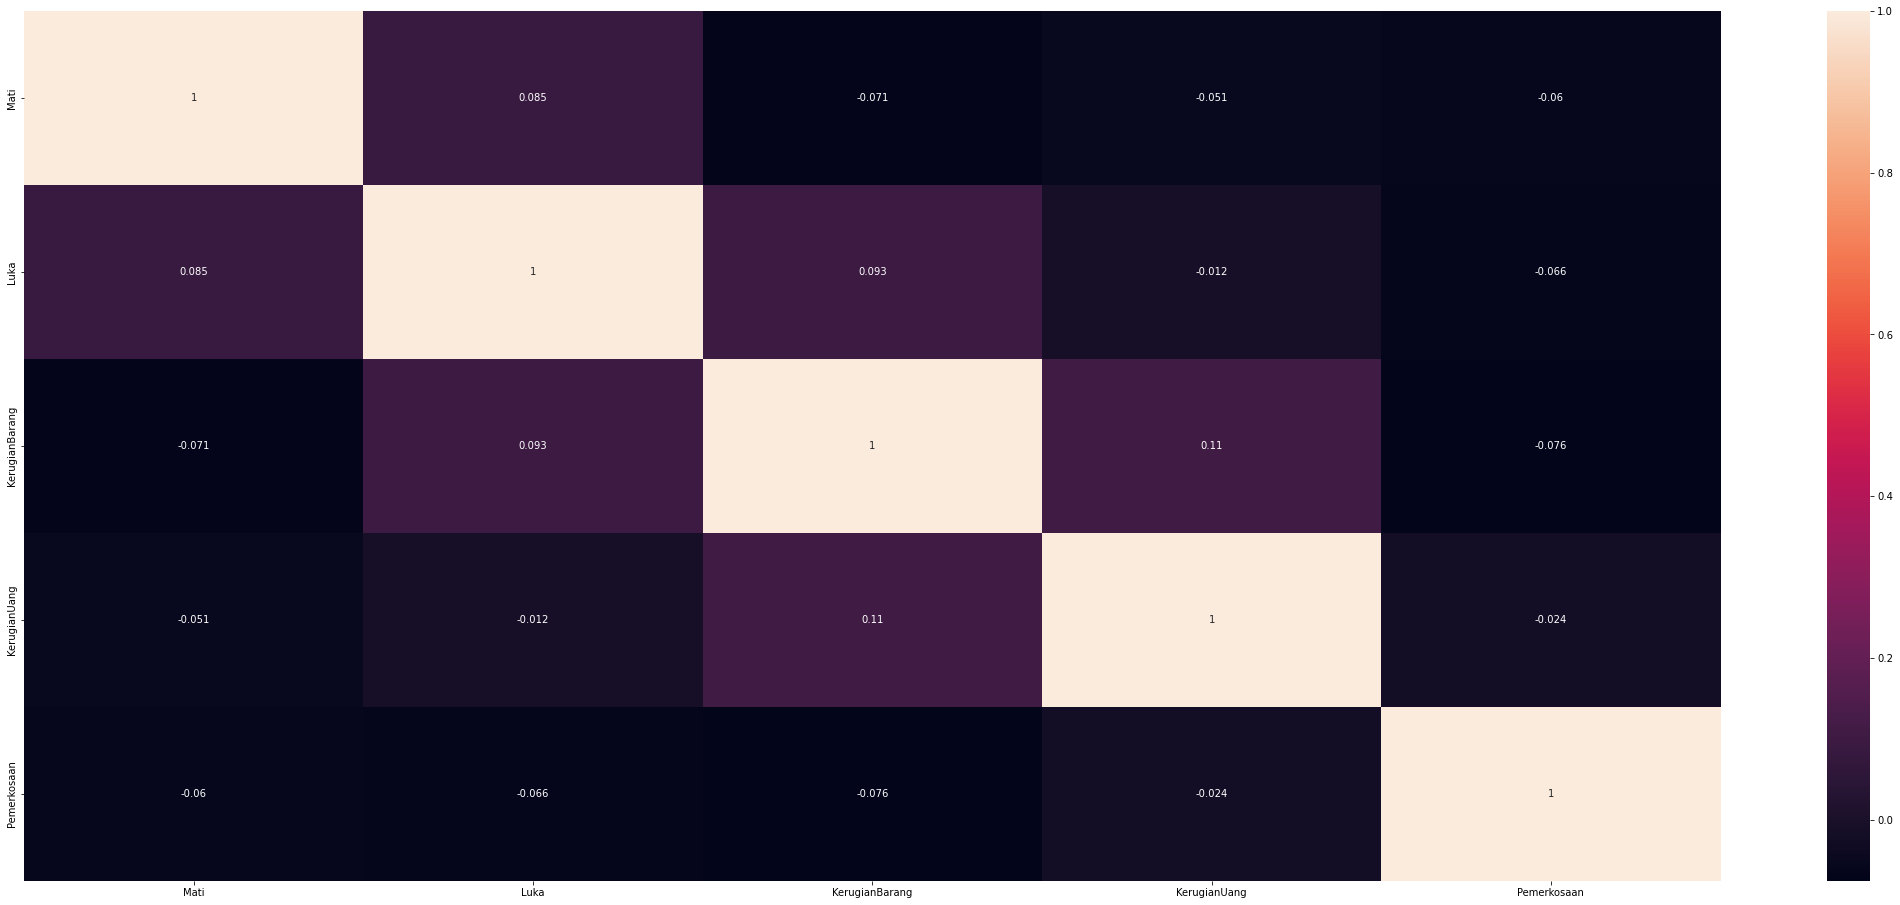

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (38,16))
sns.heatmap(dataset.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

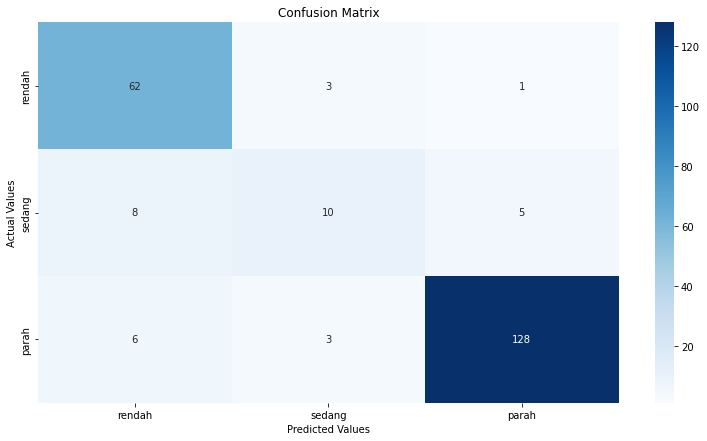

In [14]:
cm=confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['rendah','sedang','parah'], 
                     columns = ['rendah','sedang','parah'])
plt.figure(figsize=(13,7))
plt.title("Confusion Matrix")
sns.heatmap(cm_df, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')